In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from matplotlib.gridspec import GridSpec

from astropy.io import fits
from astropy.table import Table
#from reproject import reproject_interp

from astropy.wcs import WCS
from astropy.visualization import *
from skimage.filters import unsharp_mask
from astropy.wcs.utils import proj_plane_pixel_scales
from matplotlib.patches import Rectangle, Ellipse
from astropy.visualization import (MinMaxInterval, SqrtStretch, ImageNormalize, PercentileInterval, AsinhStretch, ManualInterval)
from astropy.coordinates import SkyCoord
from spectral_cube import SpectralCube
from radio_beam import Beam
from astropy.cosmology import FlatLambdaCDM

z = 0.007214
c = 299792.5
ngc1266_vel = c*z
cosmo = FlatLambdaCDM(H0=70., Om0=0.3)


In [2]:
#load in output maps
#maps_fl = fits.open('/Users/jotter/highres_PSBs/ngc1266_MUSE/output/fitsimages/NGC1266_maps_run1_sortmid.fits')
maps_fl = fits.open('/Users/jotter/highres_PSBs/ngc1266_MUSE/output/fitsimages/NGC1266_maps_run3_sortmid.fits')

maps_header = maps_fl[0].header
#maps_wcs = WCS(maps_fl[0].header).celestial
maps_data = maps_fl[0].data
maps_fl.close()

num_map = maps_data[0,:,:]
vel_c1 = maps_data[2,:,:]
vel_c2 = maps_data[3,:,:]
vel_c3 = maps_data[4,:,:]

sig_c1 = maps_data[5,:,:]
sig_c2 = maps_data[6,:,:]
sig_c3 = maps_data[7,:,:]

#scalebar
#scalebar_05kpc_arcsec = cosmo.arcsec_per_kpc_comoving(z)/2
#muse_pix_scale = proj_plane_pixel_scales(maps_wcs) * u.degree
#scalebar_05kpc_pix = float(scalebar_05kpc_arcsec/(muse_pix_scale[0]) * 1.*u.kpc)

##cube

cube_fl = fits.open('/Users/jotter/highres_PSBs/ngc1266_data/MUSE/ADP.2019-02-25T15 20 26.375.fits')
cube_header = cube_fl[1].header
wave = cube_header['CRVAL3']+(np.arange(0, cube_header['NAXIS3'])*cube_header['CD3_3'])
cube_wcs = WCS(cube_header).celestial

cube_fl.close()

plotname = 'run2_sortmid'

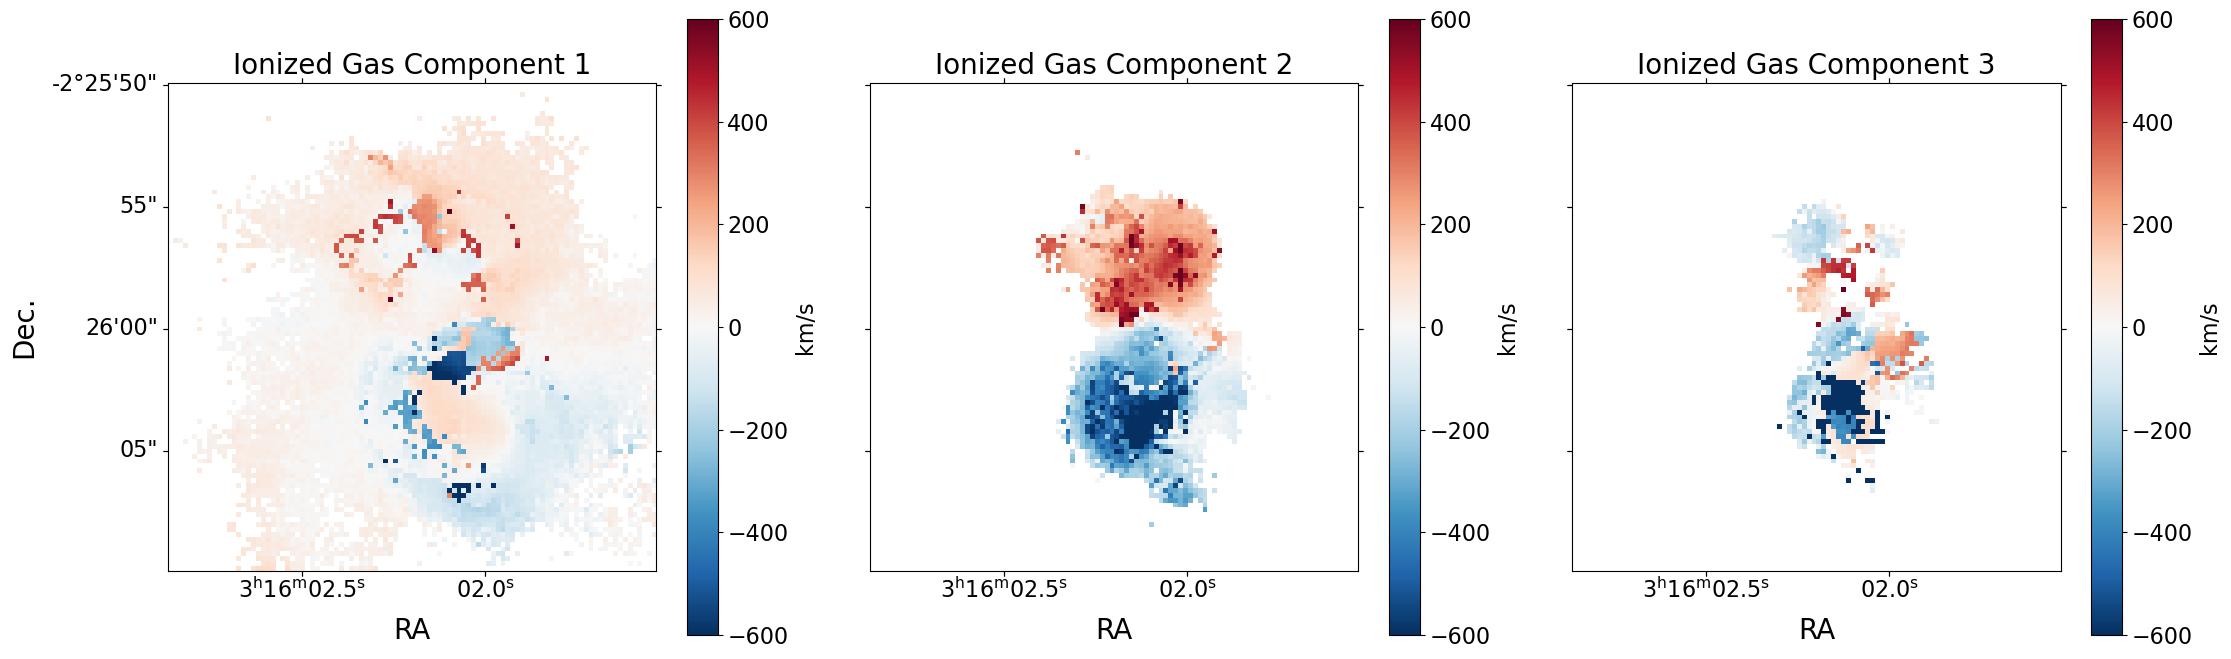

In [3]:
fig = plt.figure(figsize=(26,8))
gs = GridSpec(1,3, wspace=0.15)

ax0 = fig.add_subplot(gs[0,0], projection=cube_wcs)
#ax0 = fig.add_subplot(131, projection=cube_wcs)

#hst_levels = np.log10([0.02, 0.05, 0.1, 0.5]) + np.nanmax(log_hst_img)
#ax0.contour(log_hst_img, hst_levels, transform=ax0.get_transform(hst_wcs), colors='darkgreen', linestyles='dashed')

col = ax0.imshow(vel_c1, cmap='RdBu_r', vmin=-600, vmax=600, origin='lower')
cb0 = fig.colorbar(col, label='km/s', ax=ax0)

cb0.ax.tick_params(axis='y', labelsize=16)
cb0.ax.set_ylabel('km/s', fontsize=16)

ax0.set_title('Ionized Gas Component 1', fontsize=20)
ax0.set_ylabel('Dec.', fontsize=20)
ax0.set_xlabel('RA', fontsize=20)

ax0.tick_params(axis='both', labelsize=16)

#ax0.set_xlim(5,105)
#ax0.set_ylim(5,105)

#scalebar

#r = Rectangle((12,12), scalebar_05kpc_pix, 2,
#              edgecolor='black', facecolor='black')
#ax0.add_patch(r)
#ax0.text(12,15, '500 pc', fontsize=14)


ax1 = fig.add_subplot(132, projection=cube_wcs)

col1 = ax1.imshow(vel_c2, cmap='RdBu_r', vmin=-600, vmax=600, origin='lower')#, transform=ax1.get_transform(cube_wcs))


ax2 = fig.add_subplot(133, projection=cube_wcs)
col2 = ax2.imshow(vel_c3, cmap='RdBu_r', vmin=-600, vmax=600, origin='lower')

cb1 = fig.colorbar(col1, label='km/s', ax=ax1)
cb2 = fig.colorbar(col2, label='km/s', ax=ax2)

cb1.ax.tick_params(axis='y', labelsize=16)
cb1.ax.set_ylabel('km/s', fontsize=16)

cb2.ax.tick_params(axis='y', labelsize=16)
cb2.ax.set_ylabel('km/s', fontsize=16)

ax1.set_title('Ionized Gas Component 2', fontsize=20)
ax1.set_ylabel(' ', fontsize=14)
ax1.set_xlabel('RA', fontsize=20)

ax1.tick_params(axis='y', labelleft=False)
ax1.tick_params(axis='x', labelsize=16)

#ax1.set_xlim(5,105)
#ax1.set_ylim(5,105)

ax2.set_title('Ionized Gas Component 3', fontsize=20)
ax2.set_ylabel(' ', fontsize=14)
ax2.set_xlabel('RA', fontsize=20)

ax2.tick_params(axis='y', labelleft=False)
ax2.tick_params(axis='x', labelsize=16)

#ax2.set_xlim(5,105)
#ax2.set_ylim(5,105)

plt.savefig(f'/Users/jotter/highres_PSBs/plots/MUSE_velmaps_{plotname}.png', dpi=500, bbox_inches='tight')

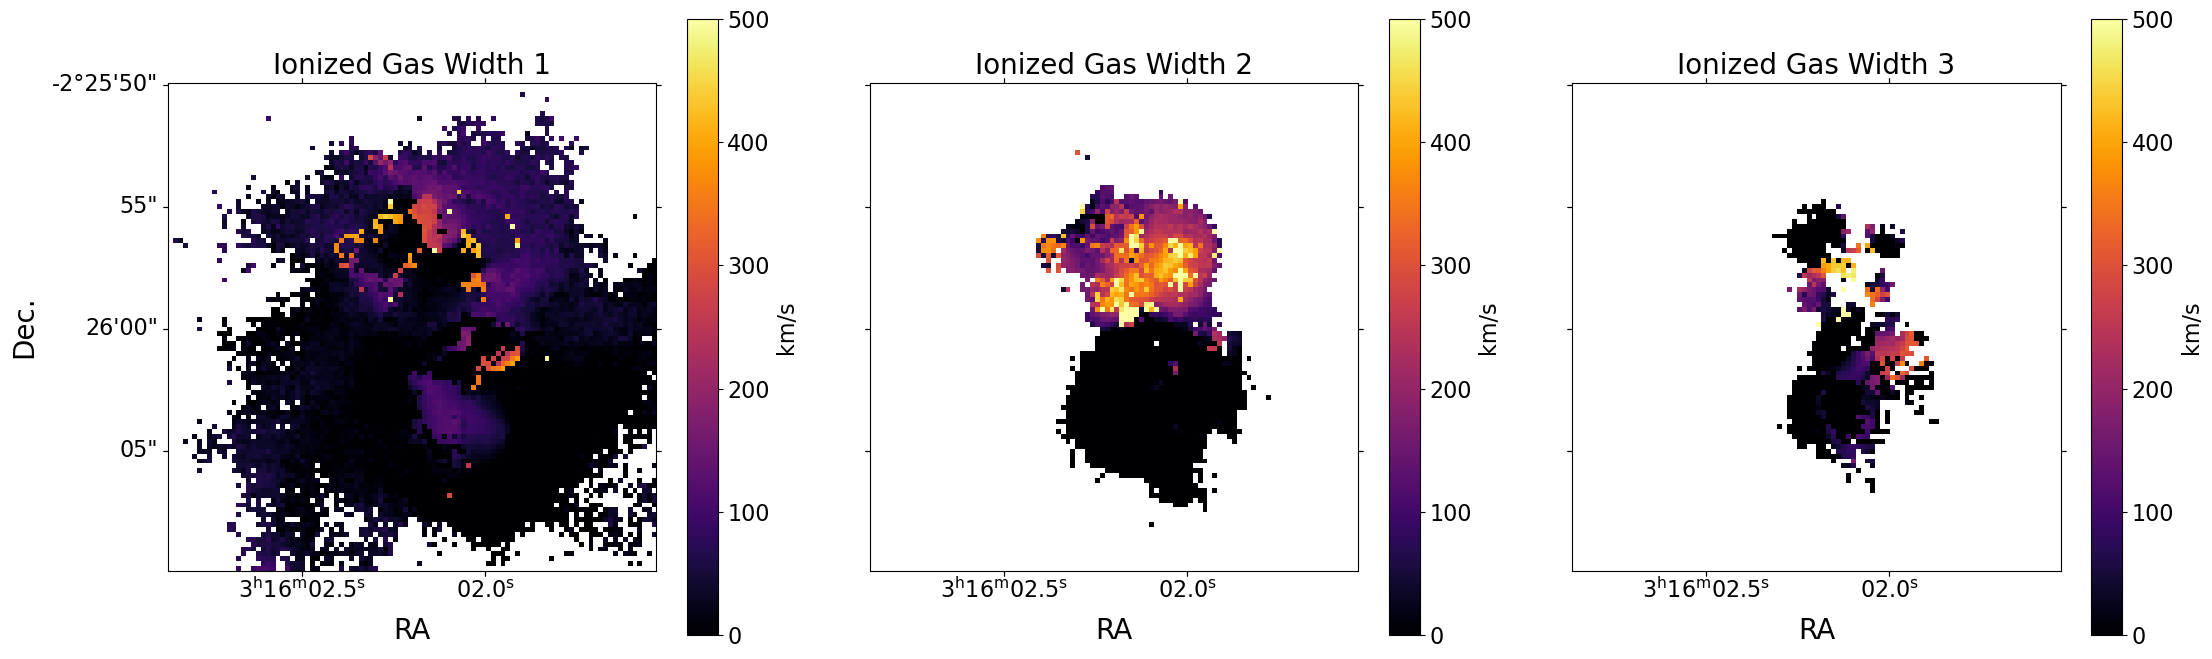

In [4]:
fig = plt.figure(figsize=(26,8))
gs = GridSpec(1,3, wspace=0.15)

ax0 = fig.add_subplot(gs[0,0], projection=cube_wcs)
#ax0 = fig.add_subplot(131, projection=cube_wcs)

#hst_levels = np.log10([0.02, 0.05, 0.1, 0.5]) + np.nanmax(log_hst_img)
#ax0.contour(log_hst_img, hst_levels, transform=ax0.get_transform(hst_wcs), colors='darkgreen', linestyles='dashed')

col = ax0.imshow(vel_c1, cmap='inferno', vmin=0, vmax=500, origin='lower')
cb0 = fig.colorbar(col, label='km/s', ax=ax0)

cb0.ax.tick_params(axis='y', labelsize=16)
cb0.ax.set_ylabel('km/s', fontsize=16)

ax0.set_title('Ionized Gas Width 1', fontsize=20)
ax0.set_ylabel('Dec.', fontsize=20)
ax0.set_xlabel('RA', fontsize=20)

ax0.tick_params(axis='both', labelsize=16)

#ax0.set_xlim(5,105)
#ax0.set_ylim(5,105)

#scalebar

#r = Rectangle((12,12), scalebar_05kpc_pix, 2,
#              edgecolor='black', facecolor='black')
#ax0.add_patch(r)
#ax0.text(12,15, '500 pc', fontsize=14)


ax1 = fig.add_subplot(132, projection=cube_wcs)

col1 = ax1.imshow(vel_c2, cmap='inferno', vmin=0, vmax=500, origin='lower')#, transform=ax1.get_transform(cube_wcs))


ax2 = fig.add_subplot(133, projection=cube_wcs)
col2 = ax2.imshow(vel_c3, cmap='inferno', vmin=0, vmax=500, origin='lower')

cb1 = fig.colorbar(col1, label='km/s', ax=ax1)
cb2 = fig.colorbar(col2, label='km/s', ax=ax2)

cb1.ax.tick_params(axis='y', labelsize=16)
cb1.ax.set_ylabel('km/s', fontsize=16)

cb2.ax.tick_params(axis='y', labelsize=16)
cb2.ax.set_ylabel('km/s', fontsize=16)

ax1.set_title('Ionized Gas Width 2', fontsize=20)
ax1.set_ylabel(' ', fontsize=14)
ax1.set_xlabel('RA', fontsize=20)

ax1.tick_params(axis='y', labelleft=False)
ax1.tick_params(axis='x', labelsize=16)

#ax1.set_xlim(5,105)
#ax1.set_ylim(5,105)

ax2.set_title('Ionized Gas Width 3', fontsize=20)
ax2.set_ylabel(' ', fontsize=14)
ax2.set_xlabel('RA', fontsize=20)

ax2.tick_params(axis='y', labelleft=False)
ax2.tick_params(axis='x', labelsize=16)

#ax2.set_xlim(5,105)
#ax2.set_ylim(5,105)

plt.savefig(f'/Users/jotter/highres_PSBs/plots/MUSE_sigmamaps_{plotname}.png', dpi=500, bbox_inches='tight')

In [4]:
## HST data

B_fl = fits.open(f"/Users/jotter/highres_PSBs/ngc1266_data/HST/b.fits")

B_img = B_fl[0].data
B_wcs = WCS(B_fl[0].header)

B_fl.close()

norm_B = ImageNormalize(B_img, interval=AsymmetricPercentileInterval(15,99.99),
                      stretch=AsinhStretch(a=0.05))

B_unsharp = unsharp_mask(B_img, radius=10, amount=10)

norm_B_unsharp = ImageNormalize(B_unsharp, interval=AsymmetricPercentileInterval(15,90),
                      stretch=LogStretch(a=1000))

H_fl = fits.open(f"/Users/jotter/highres_PSBs/ngc1266_data/HST/h.fits")

H_img = H_fl[0].data
H_wcs = WCS(H_fl[0].header)

H_fl.close()

norm_H = ImageNormalize(H_img, interval=AsymmetricPercentileInterval(15,99.99),
                      stretch=AsinhStretch(a=0.05))

H_unsharp = unsharp_mask(H_img, radius=1, amount=1)

norm_H_unsharp = ImageNormalize(H_unsharp, interval=AsymmetricPercentileInterval(15,99.99),
                      stretch=AsinhStretch(a=0.05))


## load in HST data

hst_fl = fits.open('/Users/jotter/highres_PSBs/ngc1266_data/HST/ngc1266_f160w_0p14_drz.fits')

hst_img = hst_fl[1].data
hst_header = hst_fl[1].header
hst_fl.close()

hst_wcs = WCS(hst_header)

log_hst_img = np.log10(hst_img)

norm_hst = ImageNormalize(hst_img, interval=PercentileInterval(99.993),
                      stretch=SqrtStretch())
norm_hst_deep = ImageNormalize(hst_img, interval=PercentileInterval(99.9995),
                      stretch=SqrtStretch())

/Users/jotter/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/Users/jotter/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log10


In [6]:
## load in VLA data
vla_fl = fits.open('/Users/jotter/highres_PSBs/ngc1266_data/VLA/NGC1266_Cband_Aconfig_subim.fits')

vla_data = vla_fl[0].data.squeeze()
vla_header = vla_fl[0].header

vla_fl.close()

vla_wcs = WCS(vla_header).celestial

#vla_levels = np.array([1,3,6,15,50,136]) * 0.07*1e-3
vla_levels = np.nanmax(vla_data) * np.array([0.005, 0.01, 0.05, 0.3, 0.7, 0.95])



NameError: name 'reproject_interp' is not defined

In [7]:
##loading in CO data

co_path = '/Users/jotter/highres_PSBs/ngc1266_data/ngc1266_co.fits'
co_cube = SpectralCube.read(co_path)

co_freq = 115.3 * u.GHz
co_freq_obs = co_freq / (1+z)
co_cube_kms = co_cube.with_spectral_unit(u.km/u.s, velocity_convention='optical', rest_value=co_freq_obs)
co_slab = co_cube_kms.spectral_slab(-600*u.km/u.s, 600*u.km/u.s)

co_wcs = co_cube_kms.wcs.celestial

co_mom0 = co_slab.moment(0)

co_beam = Beam.from_fits_header(co_cube.header)

co_pix_size = co_cube.header['CDELT2']
beam_area = co_beam.major * co_beam.minor * 2*np.pi/(8*np.log(2)) #degrees**2
beam_area_per_pix = beam_area / ((co_pix_size * u.degree)**2)

print(beam_area_per_pix)

co_mom0 = co_mom0/beam_area_per_pix

124.12990410270578
